# Домашнее задание №4

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import re

%matplotlib inline

Загрузить датасет на выбор.
Например, датасет о футболистах (для тех, кто интересуется футболом): https://www.kaggle.com/karangadiya/fifa19

In [2]:
path = r'C:\Users\sesa514967\Desktop\pthon\fifa data'.replace('\\','/') + '/'
fifa = pd.read_csv(path + 'fifa data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


1. row - number
2. ID - unique id for every player
3. Name - name
4. Age - age
5. Photo - url to the player's photo
6. Nationality - nationality
7. Flag - url to players's country flag
8. Overall - overall rating
9. Potential - potential rating
10. Club - current club
11. Club Logo - url to club logo
12. Value - current market value
13. Wage - current wage
14. Special - special
15. Preferred Foot - left/right
16. International Reputation - rating on scale of 5
17. Weak Foot - rating on scale of 5
18. Skill Move - srating on scale of 5
19. Work Rate - attack work rate/defence work rate
20. Body Type - body type of player
21. Real Face - true or false
22. Position - position on the pitch
23. Jersey Number - jersey number
24. Joined - joined date
25. Loaned From - club name if applicable
26. Contract Valid Until - contract end date
27. Height - height of the player
28. Weight - weight of the player
28. LSrating - on scale of 100
30. STrating - on scale of 100
31. RSrating - on scale of 100
32. LWrating - on scale of 100
33. LFrating - on scale of 100
34. CFrating - on scale of 100
35. RFrating - on scale of 100
36. RWrating - on scale of 100
37. LAMrating - on scale of 100
38. CAMrating - on scale of 100
39. RAMrating - on scale of 100
40. LMrating - on scale of 100
41. LCMrating - on scale of 100
42. CMrating - on scale of 100
43. RCMrating - on scale of 100
44. RMrating - on scale of 100
45. WBrating - on scale of 100
46. LDMrating - on scale of 100
47. CDMrating - on scale of 100
48. RDMrating - on scale of 100
49. RWBrating - on scale of 100
50. LBrating - on scale of 100
51. LCBrating - on scale of 100
52. CBrating - on scale of 100
53. RCBrating - on scale of 100
54. RBrating - on scale of 100
55. Crossingrating - on scale of 100
56. Finishingrating - on scale of 100
57. HeadingAccuracyrating - on scale of 100
58. ShortPassingrating - on scale of 100
59. Volleysrating - on scale of 100
60. Dribblingrating - on scale of 100
61. Curverating - on scale of 100
62. FKAccuracyrating - on scale of 100
63. LongPassingrating - on scale of 100
64. BallControlrating - on scale of 100
65. Accelerationrating - on scale of 100
66. SprintSpeedrating - on scale of 100
67. Agilityrating - on scale of 100
68. Reactionsrating - on scale of 100
69. Balancerating - on scale of 100
70. ShotPowerrating - on scale of 100
71. Jumpingrating - on scale of 100
72. Staminarating - on scale of 100
73. Strengthrating - on scale of 100
74. LongShotsrating - on scale of 100
75. Aggressionrating - on scale of 100
76. Interceptionsrating - on scale of 100
77. Positioningrating - on scale of 100
78. Visionrating - on scale of 100
79. Penaltiesrating - on scale of 100
80. Composurerating - on scale of 100
81. Markingrating - on scale of 100
82. StandingTacklerating - on scale of 100
83. SlidingTacklerating - on scale of 100
83. GKDivingrating - on scale of 100
85. GKHandlingrating - on scale of 100
86. GKKickingrating - on scale of 100
87. GKPositioningrating - on scale of 100
88. GKReflexesrating - on scale of 100
89. Release Clause - release clause value

Колонки 4, 8-9, 16-18, 55 по 88 являются колонками для предсказания

In [4]:
data  = fifa[list(fifa.columns[3:4]) + list(fifa.columns[7:9]) + list(fifa.columns[15:18]) + list(fifa.columns[54:88])]
data.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Сделать график histogram для данных таблицы. К какому распределению можно отнести эти графики?

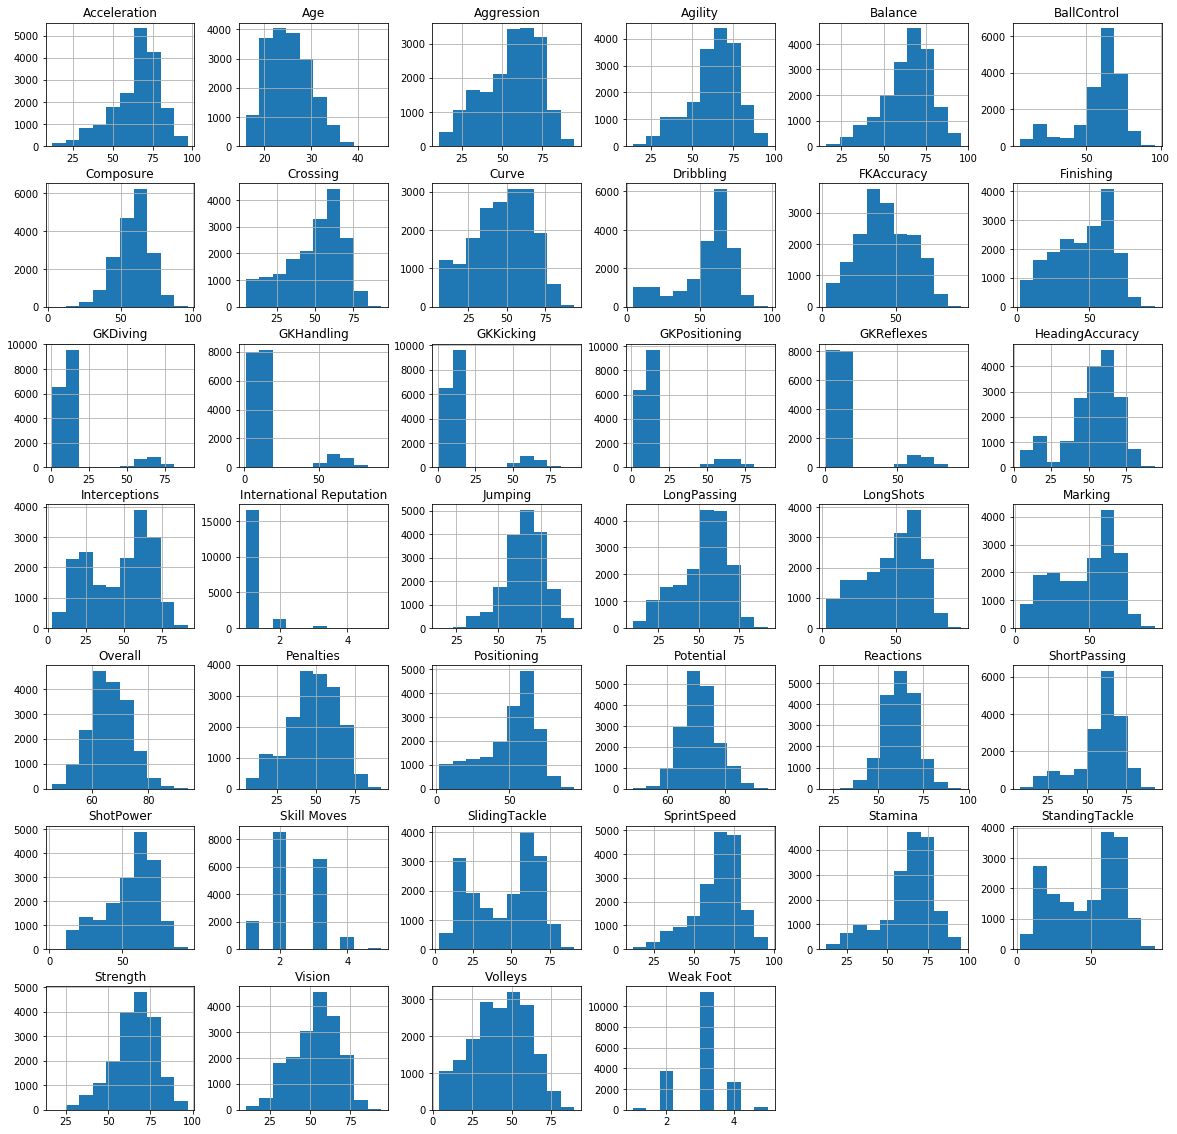

In [178]:
data.hist(figsize=(20,20))
plt.show()

In [177]:
#это просто чтоб копировать удобнее
headers = list(data.columns.values)
headers_sort = sorted(headers)
headers_sort

['Acceleration',
 'Age',
 'Aggression',
 'Agility',
 'Balance',
 'BallControl',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'FKAccuracy',
 'Finishing',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'HeadingAccuracy',
 'Interceptions',
 'International Reputation',
 'Jumping',
 'LongPassing',
 'LongShots',
 'Marking',
 'Overall',
 'Penalties',
 'Positioning',
 'Potential',
 'Reactions',
 'ShortPassing',
 'ShotPower',
 'Skill Moves',
 'SlidingTackle',
 'SprintSpeed',
 'Stamina',
 'StandingTackle',
 'Strength',
 'Vision',
 'Volleys',
 'Weak Foot']

Нормальное - Acceleration, Age, Agression,Agility,Balance,Composure,Crossing,Curve,FKAccuracy,Jumping,LongPassing,Penalties,Reactions,ShortPassing, ShotPower, SprintSpeed,Stamina,Strength,Vision,Volleys


Найти в датасете переменную, которую можно предсказать с помощью моделей машинного обучения (например, Overall - рейтинг футболиста в датасете о футболистах).

Возьмем Overall в качестве переменной, которую мы можем предсказать

Эта переменная является target value, или значение, которые мы хотим предсказать. Построить корреляцию данной переменной с другими колонками.  Сделать вывод о том, какие значения коррелируют с данной target value

In [182]:
#нормализуем параметры
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0.034483,1.000000,0.957447,1.0,0.5,0.5,0.795455,1.000000,0.466667,0.930233,...,0.609195,1.000000,-0.340659,-0.428571,-0.477273,-0.887640,-0.780220,-0.688889,-0.707865,-0.849462
1,0.172414,1.000000,0.957447,1.0,0.5,1.0,0.795455,0.978495,0.888889,0.720930,...,0.839080,0.978495,-0.450549,-0.362637,-0.545455,-0.865169,-0.780220,-0.688889,-0.707865,-0.784946
2,-0.310345,0.916667,0.914894,1.0,1.0,1.0,0.681818,0.827957,0.288889,0.790698,...,0.747126,0.956989,-0.472527,-0.516484,-0.318182,-0.820225,-0.824176,-0.688889,-0.685393,-0.784946
3,-0.241379,0.875000,0.914894,0.5,0.0,-1.0,-0.727273,-0.763441,-0.622222,0.000000,...,-0.195402,0.397849,-0.736264,-0.582418,-0.772727,1.000000,0.846154,0.911111,0.955056,1.000000
4,-0.241379,0.875000,0.872340,0.5,1.0,0.5,1.000000,0.720430,0.133333,0.976744,...,0.701149,0.827957,0.428571,0.230769,0.090909,-0.685393,-0.736264,-0.911111,-0.797753,-0.741935


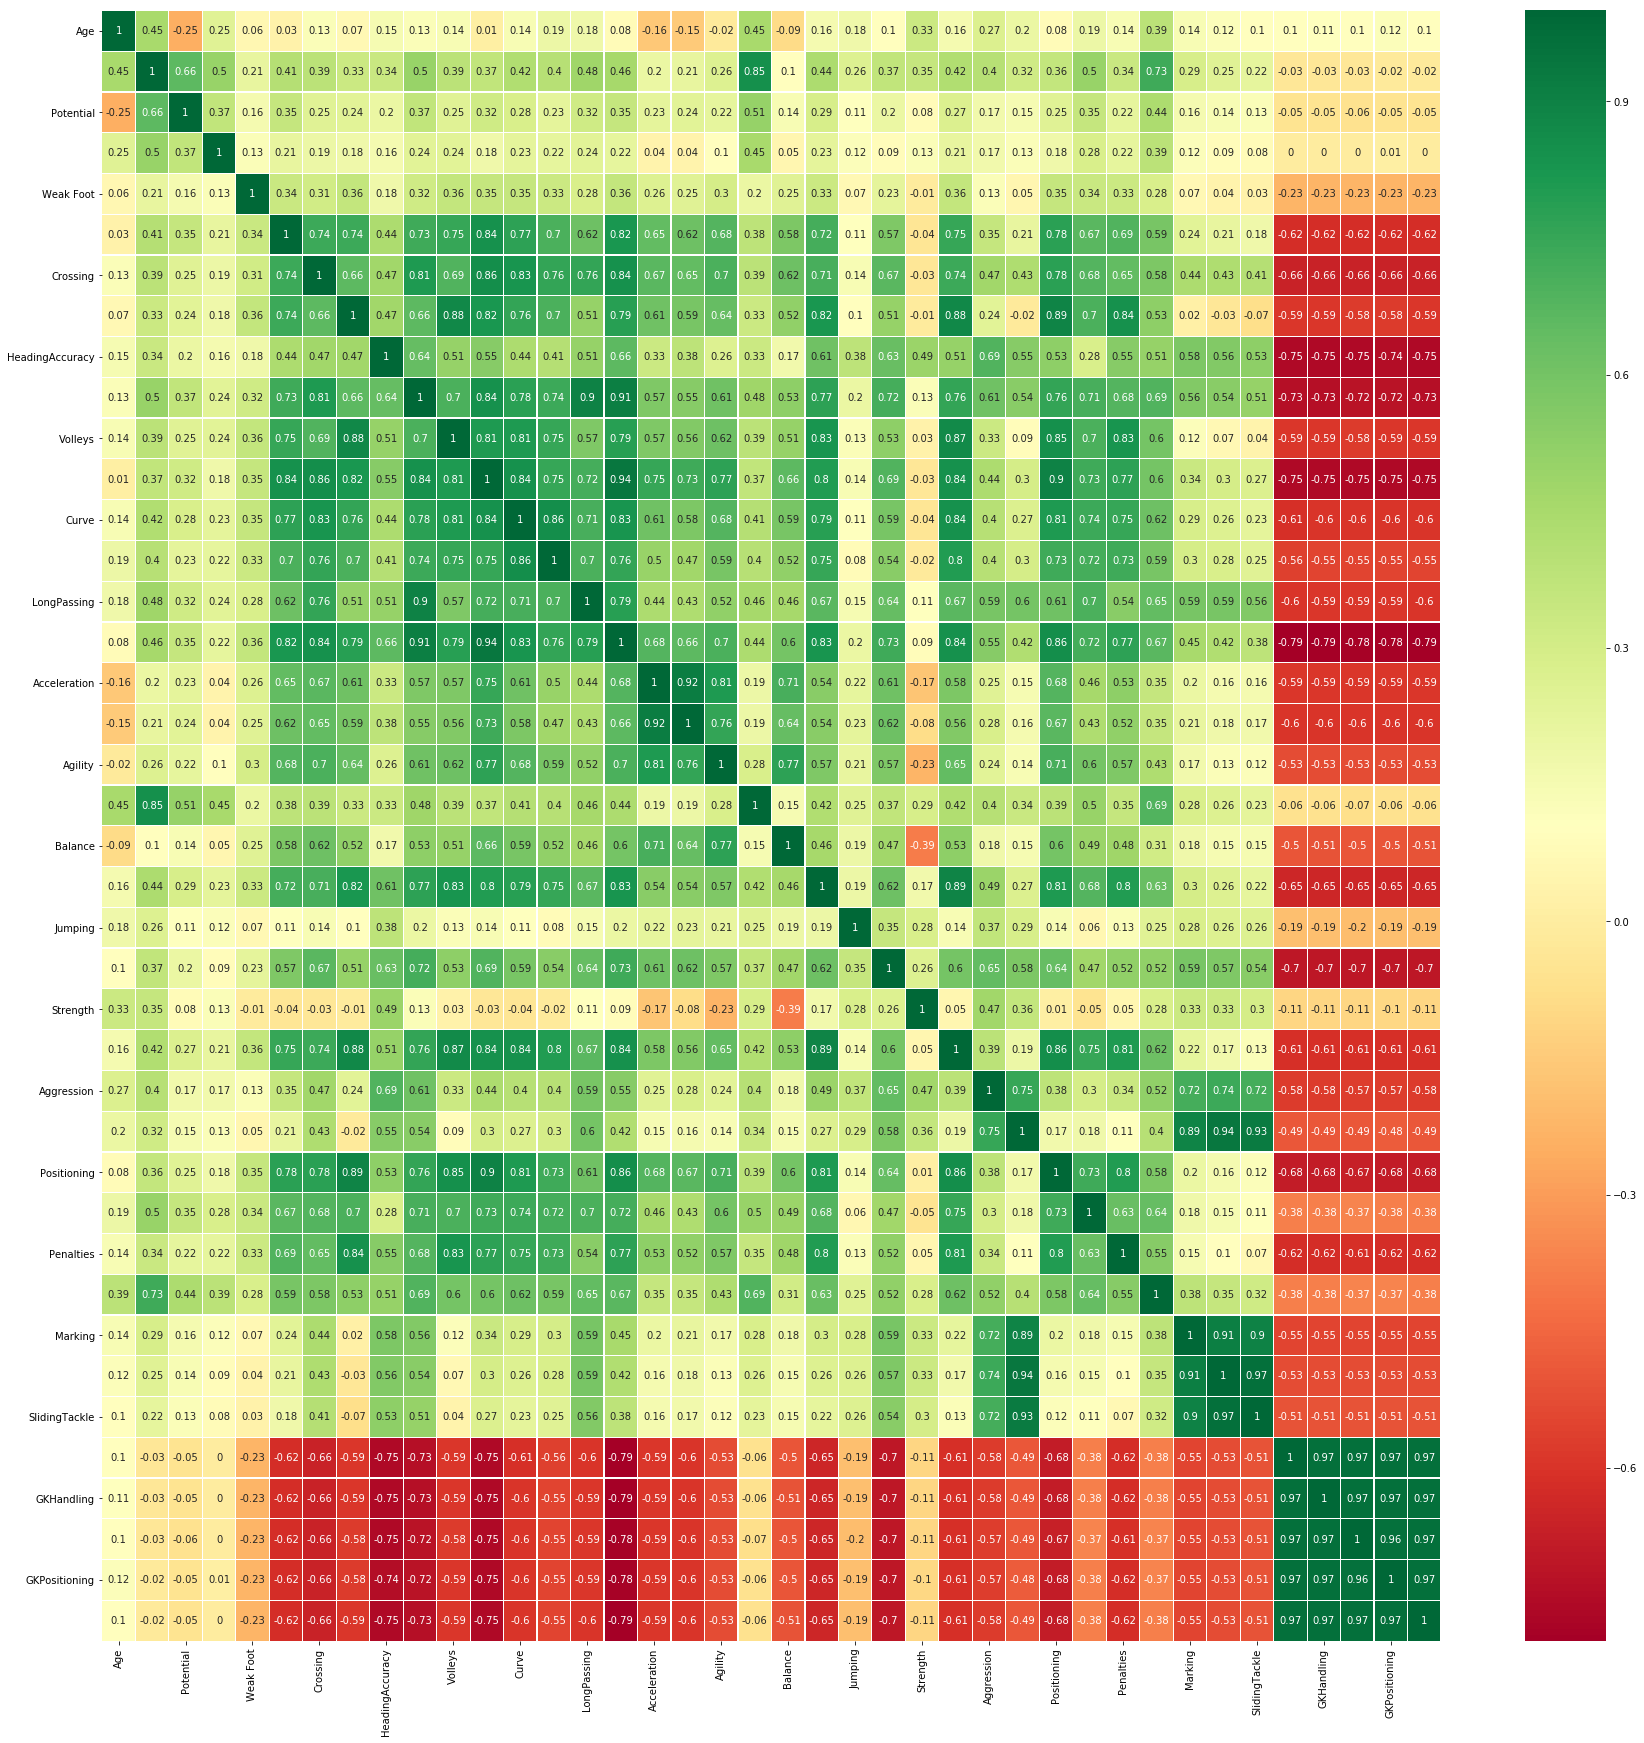

In [183]:
#построим матрицу корреляции
correlation_matrix = df_norm.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

C Overall наиболее коррелирует с Reactions - 0,85; Composure - 0,73; Potential - 0,66

Найти в датасете классификационные данные (например, в датасете о футболистах, это 
Nationality). Посмотреть количество элементов в каждом классе. Есть ли в данных проблема несбалансированности классов? Что мы можем сделать, чтобы сделать классы сбалансированными? (на эту тему можно почитать статью https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). Применить методы (если получится) для балансировки данных.

In [184]:
#посмотрим количество футболистов по странам
Nationality = df_fifa.groupby(['Nationality'])['ID'].count().reset_index(name='Count')
nationality=Nationality.sort_values('Count', ascending=False)

print('Медиана: ', statistics.median(nationality['Count']))
print('Мин: ',min(nationality['Count']))
print('Макс: ',max(nationality['Count']))

#для удобства разбила таблицу на две части (просто посмотреть, что вообще есть) - вернюю и нижнюю, чтоб не скроллить долго
n1 = nationality.head()
n2 = nationality.tail()
print (n1)
print (n2)

Медиана:  15.0
Мин:  1
Макс:  1662
    Nationality  Count
46      England   1662
59      Germany   1198
139       Spain   1072
6     Argentina    937
55       France    914
    Nationality  Count
74    Indonesia      1
63         Guam      1
141    St Lucia      1
62      Grenada      1
82       Jordan      1


Очевидно, что в данном датасете есть проблема несбалансированности классов.


Сгенерировать из классов (например, колонки  Preferred Foot,  Body Type из датасета о футболистах) вектор one-hot encoding. Для чего мы переводим классы в вектора? 

In [197]:
#Юстина, подскажите, пожалуйста, для чего мы переводим классы в вектора? я пропустила этот момент в лекции:(
data_new = pd.get_dummies(fifa, columns = ["Preferred Foot","Body Type"],
                             prefix=["Preferred Foot","Body Type"])
data_new.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling

Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

In [3]:
data_for_wage  = fifa[list(fifa.columns[3:4]) + list(fifa.columns[7:9]) + list(fifa.columns[11:13])+list(fifa.columns[15:18]) + list(fifa.columns[54:88])]
data_for_wage.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,€110.5M,€565K,5.0,4.0,4.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,€77M,€405K,5.0,4.0,5.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,€118.5M,€290K,5.0,5.0,5.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,€72M,€260K,4.0,3.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,€102M,€355K,4.0,5.0,4.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [4]:
def value_change(value):
    value_search = re.search('[^0123456789\.]', value)
    if value_search:
        return re.sub('[^0123456789\.]', '', value)
    return value

In [5]:
for value in data_for_wage:
    data_for_wage['Value'] = data_for_wage['Value'].apply(value_change)
    data_for_wage['Wage'] = data_for_wage['Wage'].apply(value_change)

data_for_wage.head()

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110.5,565,5.0,4.0,4.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77,405,5.0,4.0,5.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,118.5,290,5.0,5.0,5.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,72,260,4.0,3.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,102,355,4.0,5.0,4.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
data_for_wage.dtypes

Age                           int64
Overall                       int64
Potential                     int64
Value                        object
Wage                         object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     float64
Stamina                     float64
Strength                    float64
LongShots                   

In [7]:
data_for_wage['Value'] = data_for_wage['Value'].apply(float)
data_for_wage['Wage'] = data_for_wage['Wage'].apply(int)

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
type(data_for_wage['Value'][0])
type(data_for_wage['Wage'][0])

numpy.int64

In [9]:
data_for_wage.dropna(inplace=True)

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


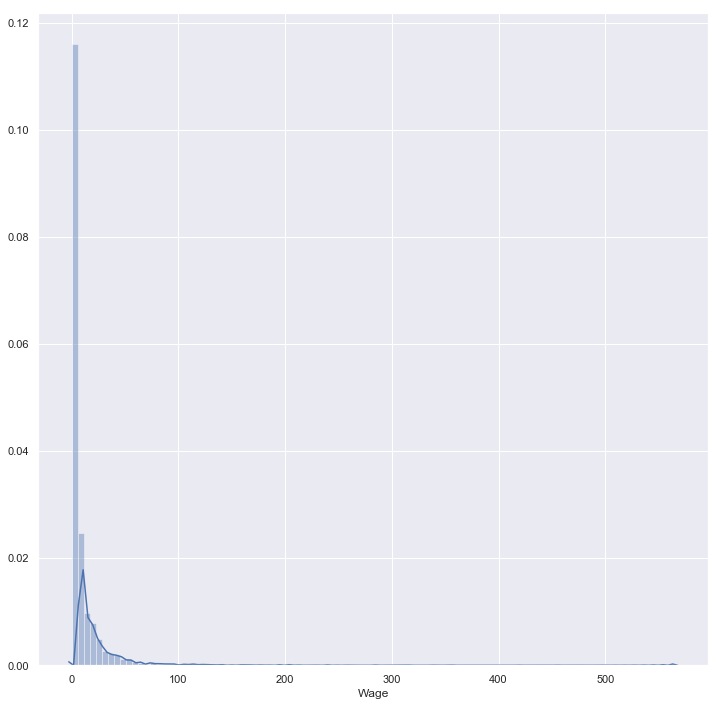

In [15]:
# посмотрим ра распределение Wage
sns.set(rc={'figure.figsize':(12,12)})
sns.distplot(data_for_wage['Wage'], bins=100)
plt.show()

Wage не похоже на нормальное распределение

In [11]:
headers = list(data_for_wage.columns.values)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data_for_wage)
data_for_wage_norm = pd.DataFrame(np_scaled)
data_for_wage_norm.columns = headers
data_for_wage_norm.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0.034483,1.000000,0.957447,-0.773333,1.000000,1.0,0.5,0.5,0.795455,1.000000,...,0.609195,1.000000,-0.340659,-0.428571,-0.477273,-0.887640,-0.780220,-0.688889,-0.707865,-0.849462
1,0.172414,1.000000,0.957447,-0.842051,0.433628,1.0,0.5,1.0,0.795455,0.978495,...,0.839080,0.978495,-0.450549,-0.362637,-0.545455,-0.865169,-0.780220,-0.688889,-0.707865,-0.784946
2,-0.310345,0.916667,0.914894,-0.756923,0.026549,1.0,1.0,1.0,0.681818,0.827957,...,0.747126,0.956989,-0.472527,-0.516484,-0.318182,-0.820225,-0.824176,-0.688889,-0.685393,-0.784946
3,-0.241379,0.875000,0.914894,-0.852308,-0.079646,0.5,0.0,-1.0,-0.727273,-0.763441,...,-0.195402,0.397849,-0.736264,-0.582418,-0.772727,1.000000,0.846154,0.911111,0.955056,1.000000
4,-0.241379,0.875000,0.872340,-0.790769,0.256637,0.5,1.0,0.5,1.000000,0.720430,...,0.701149,0.827957,0.428571,0.230769,0.090909,-0.685393,-0.736264,-0.911111,-0.797753,-0.741935


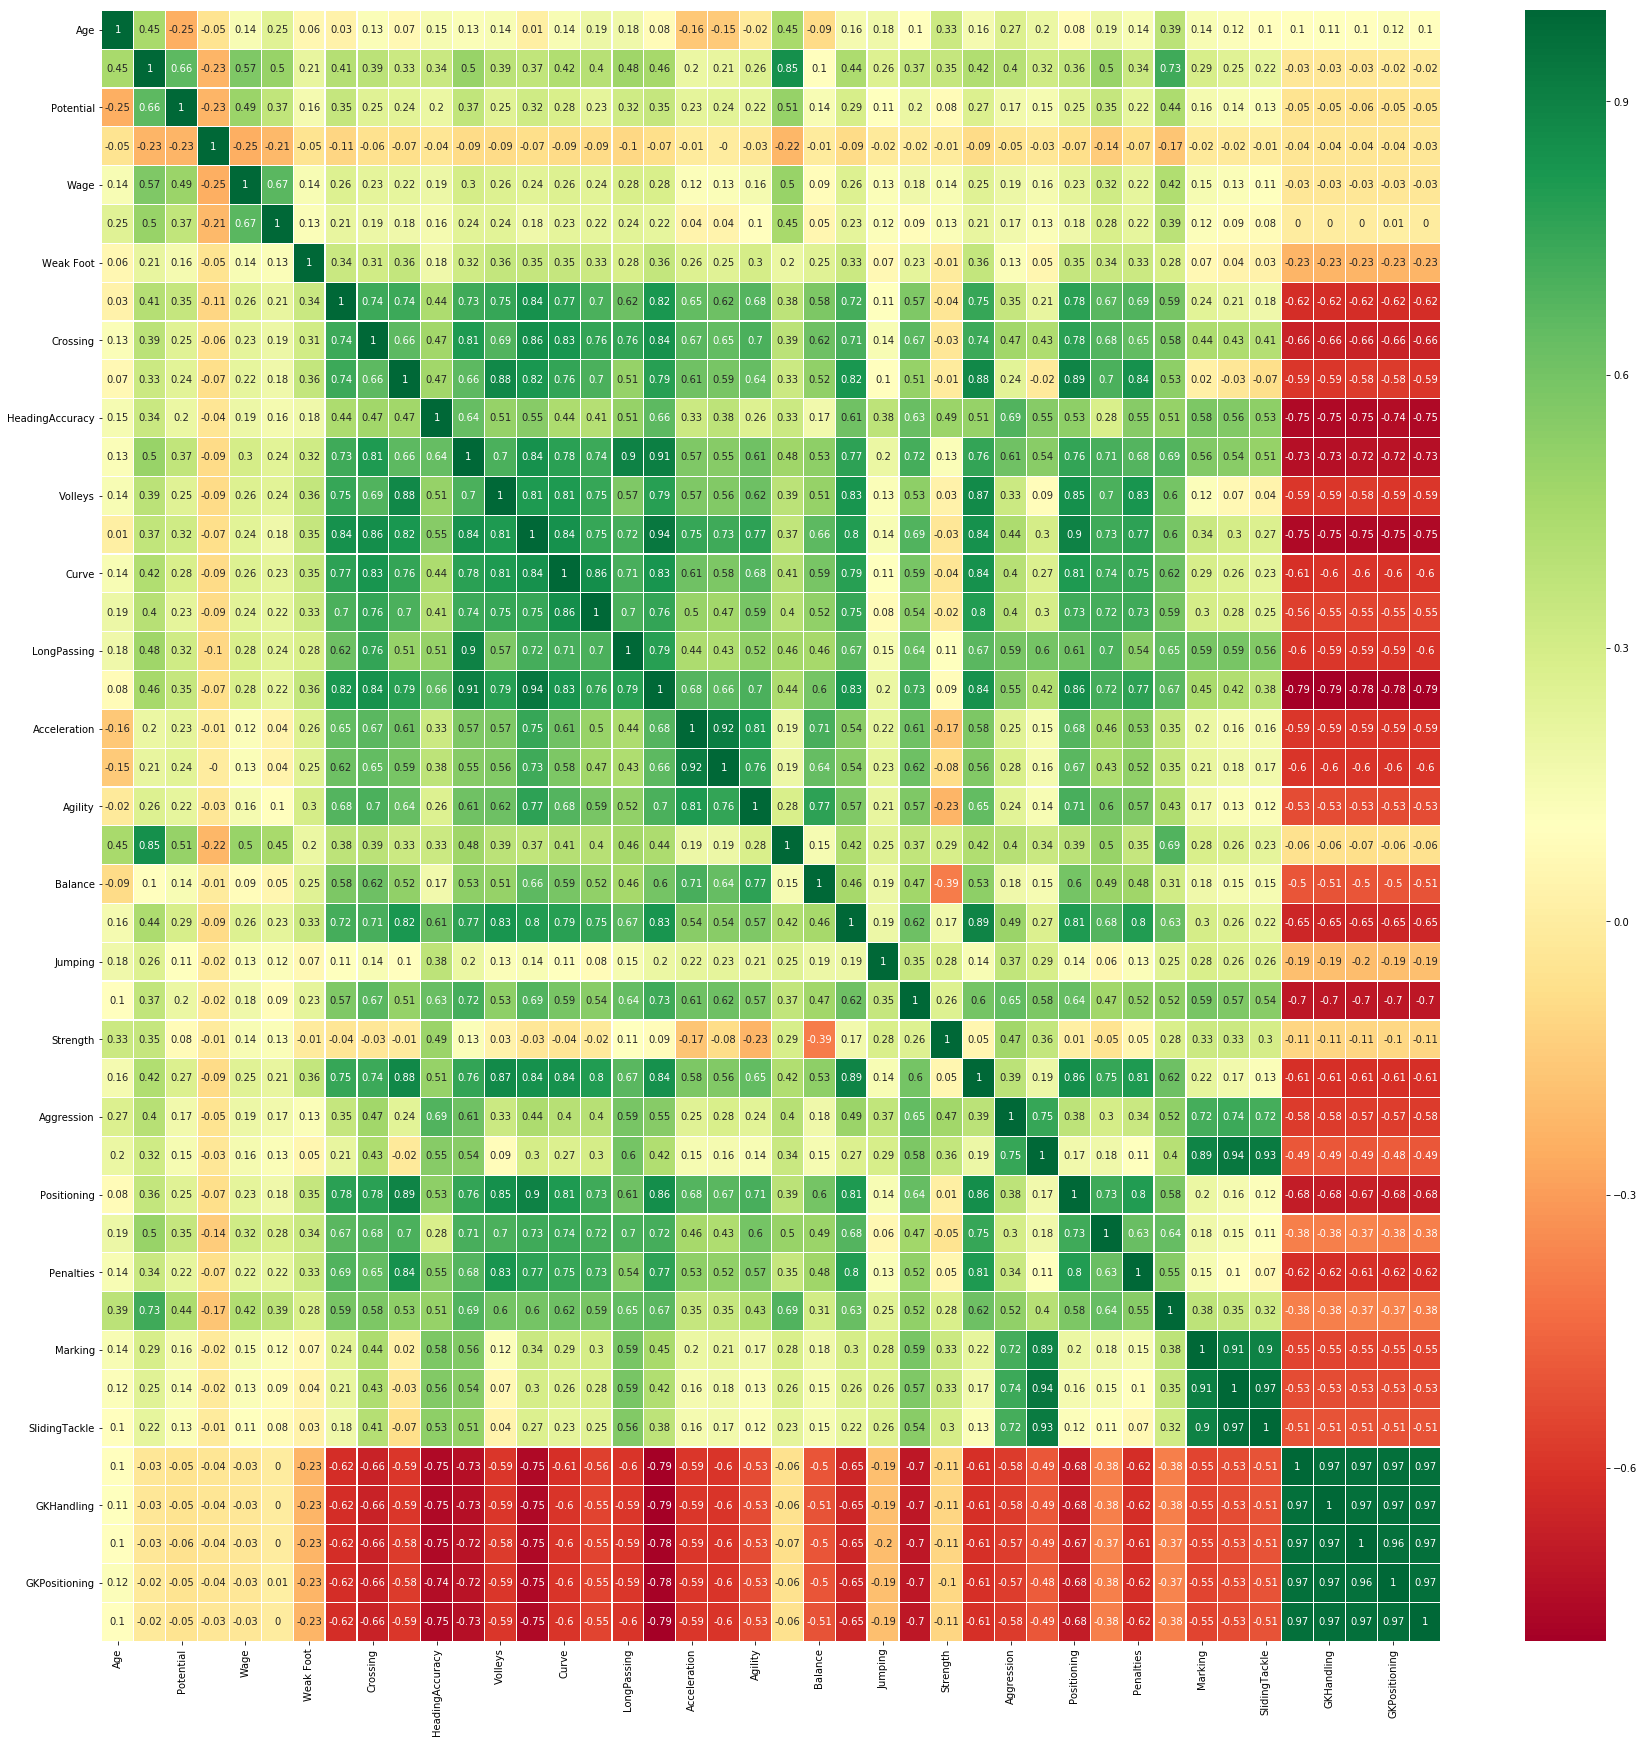

In [12]:
#построим матрицу корреляции
correlation_matrix = data_for_wage_norm.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

 С Wage наибольшим образом (более 50%) коррелируют International Reputation (0,67), Overall (0,57), Reactions(0,5)

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


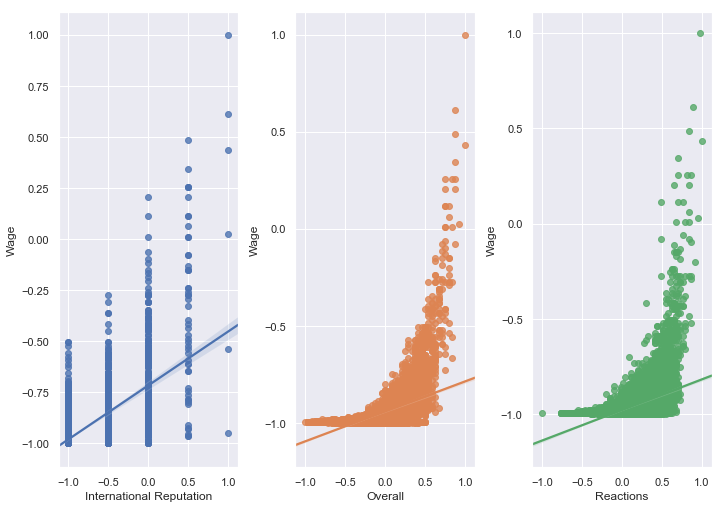

In [19]:
#построим графики корреляции
column_sels = ['International Reputation', 'Overall', 'Reactions']
x = data_for_wage_norm.loc[:,column_sels]
y = data_for_wage_norm['Wage']
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 7))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
#напишем модель линейной регресии
from sklearn.linear_model import LinearRegression
column_sels = ['International Reputation', 'Overall', 'Reactions']
x = data_for_wage.loc[:,column_sels]
International_Reputation = x['International Reputation']
Overall = x['Overall']
Reactions = x['Reactions']

y = data_for_wage['Wage']
x = np.vstack([np.array(International_Reputation), np.array(Overall), np.array(Reactions)]).T
print('x - это многомерная матрица,: ')
print(x[:3])
model = LinearRegression().fit(x, y)

x - это многомерная матрица,: 
[[ 5. 94. 95.]
 [ 5. 94. 96.]
 [ 5. 92. 94.]]


In [25]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: -88.96569659410997
slope: [ 2.85358715e+01  1.02014308e+00 -1.02345884e-02]


In [26]:
print('Предсказание модели: ', model.predict(x[0:2]))

Предсказание модели:  [148.63482442 148.62458984]


Удалить с помощью регулярного выражения из колонки Name слова с точками (A. Griezmann -> Griezmann). После этого посмотреть, какое имя встречается в таблице чаще всего?

In [53]:


def name_change(name):
    name_search = re.search('[A-Z]. ', name)
    if name_search:
        return re.sub('[A-Z]. ', '', name)
    return name

In [54]:
for name in fifa:
    data_for_wage['Name'] = data_for_wage['Name'].apply(name_change)

In [55]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [56]:
# самое часто встречающееся имя
fifa['Name'].value_counts().index[0]

'Rodríguez'

Допустим, мы хотим предсказать International Reputation основываясь на значении Value. Имеют ли данные значения корреляцию? Показать графически и математически. 

In [174]:
data_for_predict= fifa[list(fifa.columns[11:12])+list(fifa.columns[15:16])]
data_for_predict.head(5)

,Value,International Reputation
0,€110.5M,5.0
1,€77M,5.0
2,€118.5M,5.0
3,€72M,4.0
4,€102M,4.0


In [175]:
import re

def value_change(value):
    value_search = re.search('[^0123456789\.]', value)
    if value_search:
        return re.sub('[^0123456789\.]', '', value)
    return value

In [176]:
for value in data_for_predict:
    data_for_predict['Value'] = data_for_predict['Value'].apply(value_change)

data_for_predict.dropna(inplace=True)

data_for_predict.head()

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Value,International Reputation
0,110.5,5.0
1,77,5.0
2,118.5,5.0
3,72,4.0
4,102,4.0


In [179]:
data_for_predict['Value'] = data_for_predict['Value'].apply(float)

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
type(data_for_predict['Value'][0])

numpy.float64

C:\Users\sesa514967\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


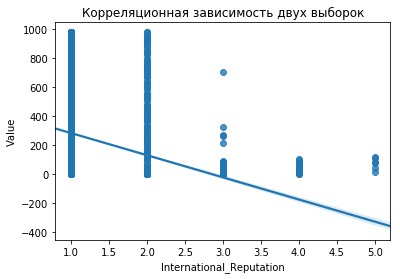

In [184]:
International_Reputation = data_for_predict['International Reputation']
Value = data_for_predict['Value']
sns.regplot(x=International_Reputation, y=Value,data=data_for_predict, fit_reg=True)
plt.xlabel('International_Reputation')
plt.ylabel('Value')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

In [183]:
from scipy.stats import pearsonr
International_Reputation = data_for_predict['International Reputation']
Value = data_for_predict['Value']
corr, p_value = pearsonr(International_Reputation, Value)
print(corr)

-0.20760893639665023


корреляция очень слабая и отрицательная, нет смысла использовать эти значения для прогнозирования

Сравнить свой анализ с ноутбуком из каггл. Например, https://www.kaggle.com/nitinchan/fifa19-analysis-viz-recommendation. Что можно добавить к анализу своей работы?

Мне понравился рейтинг игроков по национальности.
Возможно ли использовать такие данные, как национальность, в предсказаниях? Подскажите, пожалуйста, как это лучше сделать?